In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Symptoms Universe
Fiebre = np.arange(-13.5, 39.1, 0.01)
DolorCabeza = np.arange(-30, 0.3, 0.01)
Mialgia = np.arange(-30, 0.3, 0.01)
Fatiga = np.arange(-64, 0.2, 0.01)
CongestionNasal = np.arange(-30, 0.3, 0.01)
Estornudos = np.arange(-30, 0.3, 0.01)
DolorGarganta = np.arange(-30, 0.67, 0.01)
Diarrea = np.arange(-30, 0.3, 0.01)
Rinorrea = np.arange(-30, 0.3, 0.01)

# symptoms are the antecedents (inputs)
Fi = ctrl.Antecedent(Fiebre, 'Fiebre')
DC = ctrl.Antecedent(DolorCabeza, 'DolorCabeza')
Mi = ctrl.Antecedent(Mialgia, 'Mialgia')
Fa = ctrl.Antecedent(Fatiga, 'Fatiga')
CN = ctrl.Antecedent(CongestionNasal, 'CongestionNasal')
Es = ctrl.Antecedent(Estornudos, 'Estornudos')
DG = ctrl.Antecedent(DolorGarganta, 'DolorGarganta')
DR = ctrl.Antecedent(Diarrea, 'Diarrea')
Ri = ctrl.Antecedent(Rinorrea, 'Rinorrea')

# the diagnosis is the consequent (outputs)
diagno = ctrl.Consequent(np.arange(-50, 0.8, 0.01), 'diagnosis')

Fi.automf(3)
DC.automf(3)
Mi.automf(3)
Fa.automf(3)
CN.automf(3)
Es.automf(3)
DG.automf(3)
DR.automf(3)
Ri.automf(3)

# fuzzy sets
names = ['PP', 'PO', 'MP']
diagno.automf(3, names=names)

# Fiber fuzzy sets
diagno['PP'] = fuzz.sigmf(diagno.universe, [-50, 0, 0.2])
diagno['PO'] = fuzz.sigmf(diagno.universe, [0, 0.2, 0.66])
diagno['MP'] = fuzz.sigmf(diagno.universe, [0.2, 0.66, 0.8])

diagno['MP'].view()

TypeError: sigmf() missing 1 required positional argument: 'c'

Fiebre : 30
DolorGarganta : 0.6600000000047928
Diarrea : 0.0

0.4504560325361728
/home/rnovelo/Desktop/AAAIMXProjects/covid19-detection/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


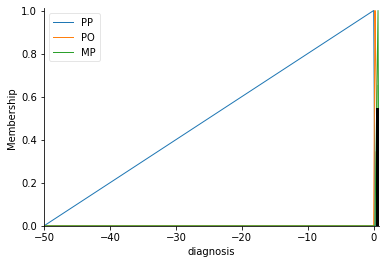

In [27]:

# covid
rule1 = ctrl.Rule(antecedent=(Fi['poor'] & DG['poor']), consequent=diagno['PP'])
rule2 = ctrl.Rule(antecedent=(Fi['poor'] & DG['average']), consequent=diagno['PP'])
rule3 = ctrl.Rule(antecedent=(Fi['good'] & DR['poor']), consequent=diagno['PP'])
rule4 = ctrl.Rule(antecedent=(Fi['good']), consequent=diagno['MP'])
rule5 = ctrl.Rule(antecedent=(Fi['average']), consequent=diagno['PO'])
rule6 = ctrl.Rule(antecedent=(Fi['poor'] & DG['good']), consequent=diagno['PP'])

system = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6])
diagnosis = ctrl.ControlSystemSimulation(system)

diagnosis.input['Fiebre'] = 30
diagnosis.input['DolorGarganta'] = 9.8
diagnosis.input['Diarrea'] = 0.0

diagnosis.compute()

print(diagnosis.input)
print(diagnosis.output['diagnosis'])
diagno.view(sim=diagnosis)